<a href="https://colab.research.google.com/github/agnesjoethomas/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("/content/lung_cancer_examples-1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [ ]:
df.drop(columns=["Surname","Name"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     59 non-null     int64
 1   Smokes  59 non-null     int64
 2   AreaQ   59 non-null     int64
 3   Alkhol  59 non-null     int64
 4   Result  59 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


In [ ]:
df.head()


,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [ ]:
df.tail()

,Age,Smokes,AreaQ,Alkhol,Result
54,26,13,6,1,0
55,77,20,5,4,1
56,75,15,3,5,1
57,43,30,3,8,1
58,51,25,9,0,0


In [ ]:
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


X_----> multiple variables stores
x--------->single var

In [ ]:
X=df.iloc[:,0:4]
X.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


In [ ]:
y=df.iloc[:,-1]
y.head()

,Result
0,1
1,1
2,0
3,0
4,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape)

(47, 4) (47,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_train=mm.fit_transform(x_train)
x_test=mm.transform(x_test)# no fitting to preventdata leakage

array([[0.69491525, 0.58823529, 0.22222222, 0.5       ],
       [0.6440678 , 0.58823529, 0.22222222, 0.375     ],
       [0.45762712, 0.05882353, 0.55555556, 0.        ],
       [0.01694915, 0.35294118, 0.77777778, 0.        ],
       [0.6779661 , 0.44117647, 1.        , 0.        ],
       [0.84745763, 0.11764706, 0.44444444, 0.75      ],
       [0.13559322, 0.38235294, 0.55555556, 0.125     ],
       [0.93220339, 0.29411765, 0.66666667, 0.75      ],
       [0.30508475, 0.38235294, 0.44444444, 0.25      ],
       [0.40677966, 0.35294118, 0.55555556, 0.25      ],
       [0.3559322 , 0.44117647, 0.66666667, 0.25      ],
       [1.        , 0.58823529, 0.44444444, 0.5       ],
       [0.3559322 , 0.52941176, 0.77777778, 0.125     ],
       [0.57627119, 0.52941176, 0.33333333, 0.625     ],
       [0.27118644, 0.35294118, 0.77777778, 0.        ],
       [0.3220339 , 0.44117647, 0.55555556, 0.25      ],
       [0.40677966, 0.64705882, 0.22222222, 0.625     ],
       [1.        , 0.08823529,

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear') # or  poly, rbf
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=svm.predict(x_test)

accuracy of the model is 91.67 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7bda33e2afc0>               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



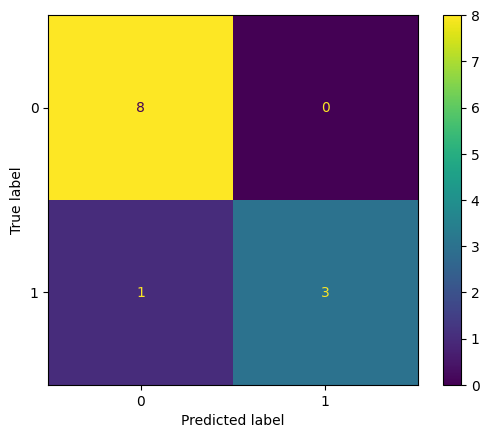

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
print("accuracy of the model is",round(accuracy_score(y_test,y_pred)*100,2),ConfusionMatrixDisplay.from_predictions(y_test,y_pred),classification_report(y_test,y_pred))